###### Задание 1
Напишите функцию, которая классифицирует фильмы из материалов занятия по правилам:

    оценка 2 и ниже — низкий рейтинг;
    оценка 4 и ниже — средний рейтинг;
    оценка 4.5 и 5 — высокий рейтинг.

Результат классификации запишите в столбец class.

In [ ]:
# Вараиант 1 без группировки

import pandas as pd

def film_classification (row):
    answer = 'средний рейтинг'
    if row['rating'] <= 2.0:
        answer = 'низкий рейтинг'
    elif row['rating'] >= 4.5:
        answer = 'высокий рейтинг'
    return answer

ratings = pd.read_csv('ratings.csv')

ratings['class'] = ratings.apply(film_classification, axis=1)
ratings.head()



In [ ]:
pip install tabulate

In [ ]:
# Вараиант 2 с группировкой

import pandas as pd
import tabulate 

def film_classification (row):
    answer = 'средний рейтинг'
    # присвоить рейтинг
    if row['rating'] <= 2.0:
        answer ='низкий рейтинг'
    elif row['rating'] >= 4.5:
        answer ='высокий рейтинг'
    return answer

ratings = pd.read_csv('ratings.csv')

# Посчитать среднее по оценкам пользователей и вывести во вспомогательный датафрейм
df = ratings[['movieId', 'rating']].groupby('movieId').mean()

# Добавить поле сlass
df['class'] = df.apply(film_classification, axis=1)

# Вывести всё с сортировкой по оценке
df.sort_values('rating', ascending=False)


In [ ]:
# Вывести 20 фильмов  с сортировкой по ID
df.sort_values('movieId', ascending=True).head(20)

In [ ]:
# Сколько фильмов с какими рейтингами 
df.groupby('class').count()

In [ ]:
ratings.info()

###### Задание 2
Используйте файл keywords.csv.

Нужно написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определённому региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

12345
'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']

}

Результат классификации запишите в отдельный столбец region.


###### Задание 3 (бонусное)

Есть мнение, что раньше снимали настоящее кино, не то что сейчас. Ваша задача — проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия: файл movies.csv и ratings.csv из базы. Нужно проверить, верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

Вы не будете затрагивать субьективные факторы выставления этих рейтингов, а пройдётесь по алгоритму:

    В переменную years запишите список из всех годов с 1950 по 2010 года.

    Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте алгоритм:
        для каждой строки пройдите по всем годам списка years;
        если номер года присутствует в названии фильма, то функция возвращает этот год, как год выпуска;
        если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год.

    Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’.

    Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга.


In [116]:
# В переменную years_list запишите загоовку списка из всех годов с 1950 по 2010 года
years_lst=[str(x) for x in range(1950, 2011,1)] 
print (years_lst)
# Подключаем данные
df_movies = pd.read_csv('movies.csv')
df_ratings = pd.read_csv('ratings.csv')


['1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010']


In [115]:
# Смотрим что внутри:
df_movies.info()
df_movies.head()
print('\n')
df_ratings.head()
df_movies.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7515 entries, 0 to 9117
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  7515 non-null   int64 
 1   title    7515 non-null   object
 2   genres   7515 non-null   object
 3   year     7515 non-null   object
dtypes: int64(1), object(3)
memory usage: 293.6+ KB




,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте алгоритм:
    для каждой строки пройдите по всем годам списка years;
    если номер года присутствует в названии фильма, то функция возвращает этот год, как год выпуска;
    если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год.

In [120]:
%%time
def production_year (row, years_list):
    for year in years_list:
        if row['title'].find(year) != -1:
            return year # год в названии найден
    year = '1900'    
    return year

# Добавить поле year, передав список годов как параметр
df_movies['year'] = df_movies.apply(production_year, years_list=years_lst, axis=1)
df_movies

Wall time: 9.72 s


,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,1900
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi,1900
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,1900
9123,164977,The Gay Desperado (1936),Comedy,1900


In [121]:
%%time
# Вариант с готовым списком внути функции чуть быстрее как ни странно:

def production_year (row):
   
    years_list = ['1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960',
                  '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971',
                  '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
                  '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
                  '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', 
                  '2005', '2006', '2007', '2008', '2009', '2010']
                
    for year in years_list:
        if row['title'].find(year) != -1:
            return year # год в названии найден
    year = '1900'    
    return year

# Добавить поле year, передав список годов как параметр

df_movies['year'] = df_movies.apply(production_year,  axis=1)
df_movies

Wall time: 9.53 s


,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,1900
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi,1900
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,1900
9123,164977,The Gay Desperado (1936),Comedy,1900


In [ ]:
# Проверить есть ли фильмы  не входяшие в диапазон
df_movies.loc[df_movies.year == '1900']


In [ ]:
# Распределение фильмов по годам выпуска 
df_movies.groupby('year').count()


In [111]:
# Исключить фильмы вне дипазона анализа
print('Было фильмов:')
df_movies.info()
print('\n')
df_movies = df_movies[df_movies.year != '1900']
print('Стало фильмов:\n')
df_movies.info()

Было фильмов:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9125 non-null   int64 
 1   title    9125 non-null   object
 2   genres   9125 non-null   object
 3   year     9125 non-null   object
dtypes: int64(1), object(3)
memory usage: 285.3+ KB


Стало фильмов:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7515 entries, 0 to 9117
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  7515 non-null   int64 
 1   title    7515 non-null   object
 2   genres   7515 non-null   object
 3   year     7515 non-null   object
dtypes: int64(1), object(3)
memory usage: 293.6+ KB


In [112]:
# Объединим датафреймы в общий фрейм:
df_all = pd.merge(df_movies, df_ratings) 
df_all.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 93079 entries, 0 to 93078
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movieId    93079 non-null  int64  
 1   title      93079 non-null  object 
 2   genres     93079 non-null  object 
 3   year       93079 non-null  object 
 4   userId     93079 non-null  int64  
 5   rating     93079 non-null  float64
 6   timestamp  93079 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.7+ MB


###### Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга.

In [122]:
# Сделаем маленькую результирующую табличку
df_result=df_all[['year','rating']].groupby('year').mean().sort_values('rating', ascending=False)
df_result.info()
print(df_result.to_markdown())

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 1957 to 2000
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  61 non-null     float64
dtypes: float64(1)
memory usage: 976.0+ bytes
|   year |   rating |
|-------:|---------:|
|   1957 |  4.01424 |
|   1972 |  4.01114 |
|   1952 |  4       |
|   1954 |  3.99422 |
|   1951 |  3.98354 |
|   1974 |  3.9787  |
|   1962 |  3.95245 |
|   1950 |  3.91525 |
|   1977 |  3.90579 |
|   1964 |  3.84149 |
|   1959 |  3.84103 |
|   1958 |  3.82317 |
|   1975 |  3.82308 |
|   1969 |  3.81738 |
|   1967 |  3.81452 |
|   1960 |  3.80921 |
|   1976 |  3.80679 |
|   1973 |  3.80667 |
|   1979 |  3.77797 |
|   1981 |  3.75876 |
|   1953 |  3.75459 |
|   1955 |  3.75172 |
|   1971 |  3.74883 |
|   1968 |  3.73784 |
|   1966 |  3.73673 |
|   1980 |  3.70882 |
|   1963 |  3.70597 |
|   1970 |  3.7     |
|   1965 |  3.67871 |
|   1961 |  3.66385 |
|   1983 |  3.65764 |
|   1984 |  3.6

Гипотеза скорее достоверна, но нужна какая-то статистическая метрика или график.
Построим график

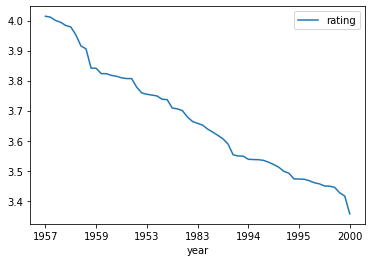

In [114]:
import matplotlib.pyplot as plt
df_result.plot()

###### Гипотеза подтверждается. 
С ростом года выпуска фильма его средний рейтинг снижается.
Очень жаль, что нет данных по последим 10 годам.